# RNA-Seq Read Counts

**Created**: 11 January 2022

## Environment

In [1]:
library(tidyverse)
library(data.table)

setwd("~/eQTL_pQTL_Characterization/")

source("03_Functional_Interpretation/scripts/utils/ggplot_theme.R")

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




## Load Data

In [2]:
read.counts <- fread("~/gains_team282/epigenetics/calderon_et_al/analysis/rna_seq/gene_counts.tsv")

In [3]:
head(read.counts)

Gene,SRR11007061,SRR11007062,SRR11007063,SRR11007064,SRR11007065,SRR11007066,SRR11007067,SRR11007068,SRR11007069,⋯,SRR7647807,SRR7647808,SRR7647809,SRR7647810,SRR7647811,SRR7647812,SRR7647813,SRR7647817,SRR7647818,SRR7647819
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000223972,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000227232,6,11,4,0,3,2,1,1,0,⋯,0,2,1,1,2,0,0,3,3,1
ENSG00000278267,0,2,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000243485,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,1,0,0
ENSG00000284332,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000237613,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
sample.info <- read.csv("03_Functional_Interpretation/metadata/reads_calderon_et_al_rna_seq.txt")

In [5]:
head(sample.info)

,Run,Assay.Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,cell_type,Center.Name,Consent,⋯,LibrarySelection,LibrarySource,lineage,Organism,Platform,ReleaseDate,Sample.Name,source_name,SRA.Study,Treatment
,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SRR11007061,RNA-Seq,192,8160479782,PRJNA484735,SAMN09768434,2579781267,CD8pos_T,GEO,public,⋯,cDNA,TRANSCRIPTOMIC,CD8,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319750,primary blood,SRP156452,no_treament
2,SRR11007062,RNA-Seq,195,15315982752,PRJNA484735,SAMN09768433,4836924733,CD8pos_T,GEO,public,⋯,cDNA,TRANSCRIPTOMIC,CD8,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319751,primary blood,SRP156452,treatment1
3,SRR11007063,RNA-Seq,195,13128598440,PRJNA484735,SAMN09768432,4155236675,Central_memory_CD8pos_T,GEO,public,⋯,cDNA,TRANSCRIPTOMIC,CD8,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319752,primary blood,SRP156452,no_treament
4,SRR11007064,RNA-Seq,193,4866405615,PRJNA484735,SAMN09768431,1546902050,Central_memory_CD8pos_T,GEO,public,⋯,cDNA,TRANSCRIPTOMIC,CD8,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319753,primary blood,SRP156452,treatment1
5,SRR11007065,RNA-Seq,195,9601276948,PRJNA484735,SAMN09768430,3023735003,Effector_memory_CD8pos_T,GEO,public,⋯,cDNA,TRANSCRIPTOMIC,CD8,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319754,primary blood,SRP156452,no_treament
6,SRR11007066,RNA-Seq,196,9273440229,PRJNA484735,SAMN09768429,2953466798,Effector_memory_CD8pos_T,GEO,public,⋯,cDNA,TRANSCRIPTOMIC,CD8,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319755,primary blood,SRP156452,treatment1


In [6]:
bam.qc <- read.table("~/gains_team282/epigenetics/calderon_et_al/analysis/rna_seq/bam_qc.tsv", sep="\t", header=TRUE)

In [7]:
head(bam.qc)

,Sample,bam.file,outfile,number.of.bases,number.of.contigs,number.of.windows,number.of.reads,number.of.mapped.reads,number.of.secondary.alignments,number.of.mapped.paired.reads..first.in.pair.,⋯,There.is.a.1.29..of.reference.with.a.coverageData..,There.is.a.1.28..of.reference.with.a.coverageData..,There.is.a.1.27..of.reference.with.a.coverageData..,There.is.a.1.26..of.reference.with.a.coverageData..,There.is.a.1.24..of.reference.with.a.coverageData..,There.is.a.1.23..of.reference.with.a.coverageData..,There.is.a.1.22..of.reference.with.a.coverageData..,There.is.a.1.21..of.reference.with.a.coverageData..,There.is.a.1.2..of.reference.with.a.coverageData..,There.is.a.1.18..of.reference.with.a.coverageData..
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SRR11007061,/nfs/users/nfs_n/nm18/gains_team282/epigenetics/calderon_et_al/processed/rna_seq//SRR7647769/alignment_post_qc/SRR7647769.duplicates.bam,./bamqc//genome_results.txt,"3,099,750,718 bp",194,593,"134,057,859","134,057,859 (100%)","24,872,590","67,032,569",⋯,42X,43X,44X,45X,46X,47X,48X,49X,50X,51X
2,SRR11007062,/nfs/users/nfs_n/nm18/gains_team282/epigenetics/calderon_et_al/processed/rna_seq//SRR7647811/alignment_post_qc/SRR7647811.duplicates.bam,./bamqc//genome_results.txt,"3,099,750,718 bp",194,593,"135,516,914","135,516,914 (100%)","29,239,074","67,759,487",⋯,42X,43X,44X,45X,46X,47X,48X,49X,50X,51X
3,SRR11007063,/nfs/users/nfs_n/nm18/gains_team282/epigenetics/calderon_et_al/processed/rna_seq//SRR11007099/alignment_post_qc/SRR11007099.duplicates.bam,./bamqc//genome_results.txt,"3,099,750,718 bp",194,593,"108,652,899","108,652,899 (100%)","70,072,583","54,340,292",⋯,42X,43X,44X,45X,46X,47X,48X,49X,50X,51X
4,SRR11007064,/nfs/users/nfs_n/nm18/gains_team282/epigenetics/calderon_et_al/processed/rna_seq//SRR7647819/alignment_post_qc/SRR7647819.duplicates.bam,./bamqc//genome_results.txt,"3,099,750,718 bp",194,593,"155,957,496","155,957,496 (100%)","15,678,514","77,980,567",⋯,42X,43X,44X,45X,46X,47X,48X,49X,50X,51X
5,SRR11007065,/nfs/users/nfs_n/nm18/gains_team282/epigenetics/calderon_et_al/processed/rna_seq//SRR11007153/alignment_post_qc/SRR11007153.duplicates.bam,./bamqc//genome_results.txt,"3,099,750,718 bp",194,593,"124,164,147","124,164,147 (100%)","10,244,691","62,089,374",⋯,42X,43X,44X,45X,46X,47X,48X,49X,50X,51X
6,SRR11007066,/nfs/users/nfs_n/nm18/gains_team282/epigenetics/calderon_et_al/processed/rna_seq//SRR11007065/alignment_post_qc/SRR11007065.duplicates.bam,./bamqc//genome_results.txt,"3,099,750,718 bp",194,593,"17,161,201","17,161,201 (100%)","5,437,987","8,581,394",⋯,42X,43X,44X,45X,46X,47X,48X,49X,50X,51X


In [8]:
rna.seq.qc <- read.table("~/gains_team282/epigenetics/calderon_et_al/analysis/rna_seq/rna_seq_qc.tsv", sep="\t", header=TRUE, fill=TRUE)

In [9]:
head(rna.seq.qc)

,Sample,bam.file,gff.file,counting.algorithm,protocol,X5..3..bias.region.size,X5..3..bias.number.of.top.transcripts,reads.aligned..left.right.,read.pairs.aligned,total.alignments,⋯,not.aligned,SSP.estimation..fwd.rev.,exonic,intronic,intergenic,overlapping.exon,X5..bias,X3..bias,X5..3..bias,reads.at.junctions
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,SRR11007061,/nfs/users/nfs_n/nm18/gains_team282/epigenetics/calderon_et_al/processed/rna_seq//SRR7647769/alignment_post_qc/SRR7647769.duplicates.bam,/lustre/scratch118/humgen/resources/rna_seq_genomes/Homo_sapiens.GRCh38.99.gtf,uniquely-mapped-reads,non-strand-specific,100,1000,"67,032,569 / 67,025,290","67,024,363","158,930,449",⋯,0,0.5 / 0.5,"12,464,246 (51.3%)","8,001,694 (32.93%)","3,830,244 (15.76%)","400,001 (1.65%)",0.85,0.73,1.19,"2,618,002"
2,SRR11007062,/nfs/users/nfs_n/nm18/gains_team282/epigenetics/calderon_et_al/processed/rna_seq//SRR7647811/alignment_post_qc/SRR7647811.duplicates.bam,/lustre/scratch118/humgen/resources/rna_seq_genomes/Homo_sapiens.GRCh38.99.gtf,uniquely-mapped-reads,non-strand-specific,100,1000,"67,759,487 / 67,757,427","67,739,955","164,755,988",⋯,0,0.5 / 0.5,"2,347,542 (46.16%)","2,338,684 (45.98%)","399,697 (7.86%)","102,308 (2.01%)",1.08,0.24,3.29,"593,395"
3,SRR11007063,/nfs/users/nfs_n/nm18/gains_team282/epigenetics/calderon_et_al/processed/rna_seq//SRR11007099/alignment_post_qc/SRR11007099.duplicates.bam,/lustre/scratch118/humgen/resources/rna_seq_genomes/Homo_sapiens.GRCh38.99.gtf,uniquely-mapped-reads,non-strand-specific,100,1000,"54,340,292 / 54,312,607","54,307,571","178,725,482",⋯,0,0.5 / 0.5,"14,118,694 (68.89%)","5,899,904 (28.79%)","476,239 (2.32%)","382,502 (1.87%)",0.93,0.79,1.24,"3,426,349"
4,SRR11007064,/nfs/users/nfs_n/nm18/gains_team282/epigenetics/calderon_et_al/processed/rna_seq//SRR7647819/alignment_post_qc/SRR7647819.duplicates.bam,/lustre/scratch118/humgen/resources/rna_seq_genomes/Homo_sapiens.GRCh38.99.gtf,uniquely-mapped-reads,non-strand-specific,100,1000,"77,980,567 / 77,976,929","77,959,712","171,636,010",⋯,0,0.5 / 0.5,"2,402,342 (57.36%)","1,526,582 (36.45%)","259,017 (6.18%)","105,801 (2.53%)",0.88,0.26,2.80,"473,488"
5,SRR11007065,/nfs/users/nfs_n/nm18/gains_team282/epigenetics/calderon_et_al/processed/rna_seq//SRR11007153/alignment_post_qc/SRR11007153.duplicates.bam,/lustre/scratch118/humgen/resources/rna_seq_genomes/Homo_sapiens.GRCh38.99.gtf,uniquely-mapped-reads,non-strand-specific,100,1000,"62,089,374 / 62,074,773","62,073,617","134,408,838",⋯,0,0.5 / 0.5,"16,478,134 (83.95%)","2,736,862 (13.94%)","414,042 (2.11%)","374,243 (1.91%)",0.86,0.73,1.22,"3,525,812"
6,SRR11007066,/nfs/users/nfs_n/nm18/gains_team282/epigenetics/calderon_et_al/processed/rna_seq//SRR11007065/alignment_post_qc/SRR11007065.duplicates.bam,/lustre/scratch118/humgen/resources/rna_seq_genomes/Homo_sapiens.GRCh38.99.gtf,uniquely-mapped-reads,non-strand-specific,100,1000,"8,581,394 / 8,579,807","8,579,774","22,599,188",⋯,0,0.5 / 0.5,"2,040,460 (69.7%)","768,717 (26.26%)","118,321 (4.04%)","92,895 (3.17%)",0.98,0.71,1.35,"709,789"


## Clean QC Data

In [10]:
bam.qc <- bam.qc %>%
    dplyr::select(
        Sample,
        reads=number.of.reads,
        mapped.bases=number.of.mapped.bases,
        sequenced.bases=number.of.sequenced.bases,
        secondary.alignments=number.of.secondary.alignments,
        first.pair.mapped=number.of.mapped.paired.reads..first.in.pair.,
        second.pair.mapped=number.of.mapped.paired.reads..second.in.pair.,
        both.in.pair.mapped=number.of.mapped.paired.reads..both.in.pair.,
        singletons.in.pair.mapped=number.of.mapped.paired.reads..singletons.,
        duplicated.reads=number.of.duplicated.reads..flagged.,
        mean.insert.size, std.insert.size, median.insert.size,
        mean.mapping.quality,
        GC.percentage,
        general.error.rate, number.of.mismatches, number.of.insertions, number.of.deletions,
        mean.coverage=mean.coverageData, std.coverage=std.coverageData
    ) %>%
    dplyr::mutate(reads=as.numeric(gsub(",", "", reads))) %>%
    dplyr::mutate(mapped.bases=as.numeric(gsub(",", "", gsub(" bp", "", mapped.bases)))) %>%
    dplyr::mutate(sequenced.bases=as.numeric(gsub(",", "", gsub(" bp", "", sequenced.bases)))) %>%
    dplyr::mutate(secondary.alignments=as.numeric(gsub(",", "", secondary.alignments))) %>%
    dplyr::mutate(first.pair.mapped=as.numeric(gsub(",", "", first.pair.mapped))) %>%
    dplyr::mutate(second.pair.mapped=as.numeric(gsub(",", "", second.pair.mapped))) %>%
    dplyr::mutate(both.in.pair.mapped=as.numeric(gsub(",", "", both.in.pair.mapped))) %>%
    dplyr::mutate(singletons.in.pair.mapped=as.numeric(gsub(",", "", singletons.in.pair.mapped))) %>%
    dplyr::mutate(duplicated.reads=as.numeric(gsub(",", "", duplicated.reads))) %>%
    dplyr::mutate(mean.insert.size=as.numeric(gsub(",", "", mean.insert.size))) %>%
    dplyr::mutate(std.insert.size=as.numeric(gsub(",", "", std.insert.size))) %>%
    dplyr::mutate(median.insert.size=as.numeric(gsub(",", "", median.insert.size))) %>%
    dplyr::mutate(mean.mapping.quality=as.numeric(gsub(",", "", mean.mapping.quality))) %>%
    dplyr::mutate(GC.percentage=as.numeric(gsub("%", "", GC.percentage)) / 100) %>%
    dplyr::mutate(number.of.mismatches=as.numeric(gsub(",", "", number.of.mismatches))) %>%
    dplyr::mutate(number.of.insertions=as.numeric(gsub(",", "", number.of.insertions))) %>%
    dplyr::mutate(number.of.deletions=as.numeric(gsub(",", "", number.of.deletions))) %>%
    dplyr::mutate(mean.coverage=as.numeric(gsub(",", "", gsub("X", "", mean.coverage)))) %>%
    dplyr::mutate(std.coverage=as.numeric(gsub(",", "", gsub("X", "", std.coverage))))

write.csv(bam.qc, "~/gains_team282/epigenetics/calderon_et_al/analysis/rna_seq/bam_qc_cleaned.csv", row.names=F)

In [11]:
rna.seq.qc <- rna.seq.qc %>%
    dplyr::select(
        Sample,
        Bias.3.Prime=X3..bias, Bias.5.Prime=X5..bias, Bias.5.3.Ratio=X5..3..bias,
        read.pairs.aligned, aligned.to.genes, ambiguous.alignments, no.feature.assigned, not.aligned,
        exonic, intronic, intergenic, overlapping.exon, reads.at.junctions
    ) %>%
    dplyr::mutate(read.pairs.aligned=as.numeric(gsub(",", "", read.pairs.aligned))) %>%
    dplyr::mutate(aligned.to.genes=as.numeric(gsub(",", "", aligned.to.genes))) %>%
    dplyr::mutate(ambiguous.alignments=as.numeric(gsub(",", "", ambiguous.alignments))) %>%
    dplyr::mutate(no.feature.assigned=as.numeric(gsub(",", "", no.feature.assigned))) %>%
    dplyr::mutate(not.aligned=as.numeric(gsub(",", "", not.aligned))) %>%
    dplyr::mutate(exonic=as.numeric(gsub(",", "", gsub(" \\(.*\\)", "", exonic)))) %>%
    dplyr::mutate(intronic=as.numeric(gsub(",", "", gsub(" \\(.*\\)", "", intronic)))) %>%
    dplyr::mutate(intergenic=as.numeric(gsub(",", "", gsub(" \\(.*\\)", "", intergenic)))) %>%
    dplyr::mutate(overlapping.exon=as.numeric(gsub(",", "", gsub(" \\(.*\\)", "", overlapping.exon)))) %>%
    dplyr::mutate(reads.at.junctions=as.numeric(gsub(",", "", reads.at.junctions)))

write.csv(rna.seq.qc, "~/gains_team282/epigenetics/calderon_et_al/analysis/rna_seq/rna_seq_qc_cleaned.csv", row.names=F)

## Basic Alignment QC

First, I checked the distribution of the number of reads mapped.

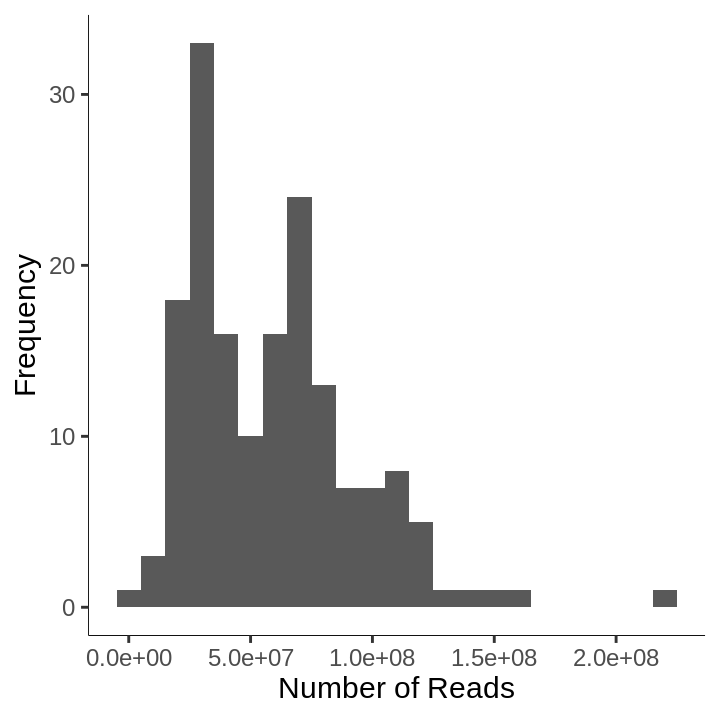

In [12]:
options(repr.plot.width=6, repr.plot.height=6)

bam.qc %>%
    ggplot(aes(x=reads)) +
    geom_histogram(binwidth=1e7) +
    xlab("Number of Reads") + ylab("Frequency") +
    ggplot_theme

Here, I checked the distribution of fragments from paired reads.

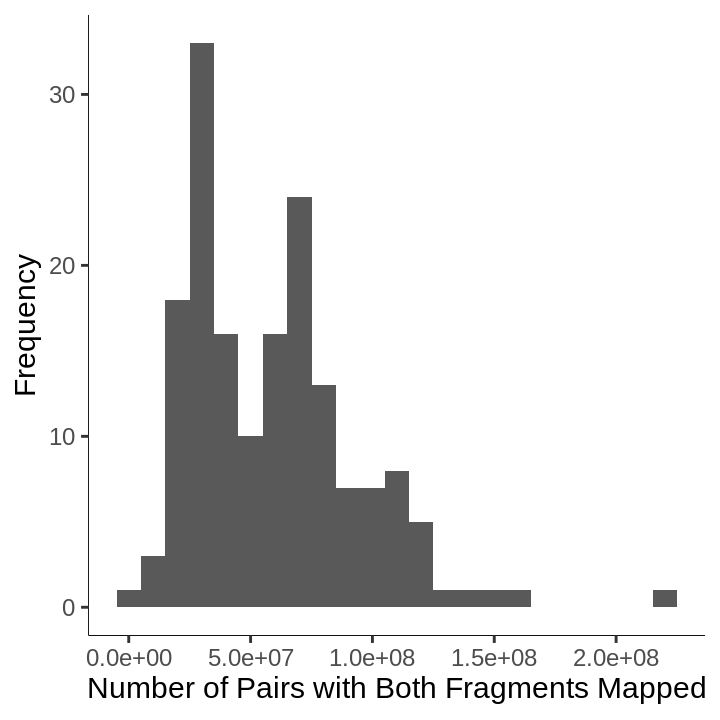

In [13]:
options(repr.plot.width=6, repr.plot.height=6)

bam.qc %>%
    ggplot(aes(x=both.in.pair.mapped)) +
    geom_histogram(binwidth=1e7) +
    xlab("Number of Pairs with Both Fragments Mapped") + ylab("Frequency") +
    ggplot_theme

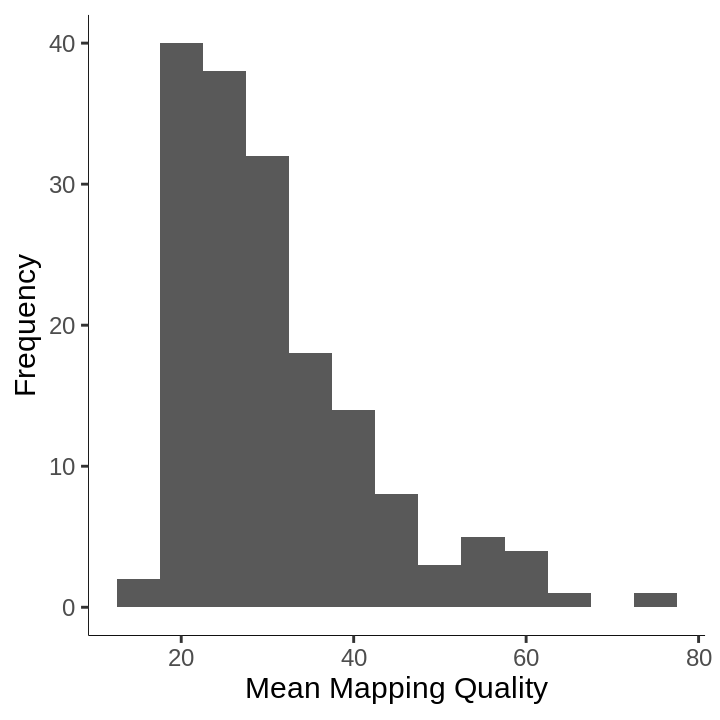

In [14]:
options(repr.plot.width=6, repr.plot.height=6)

bam.qc %>%
    ggplot(aes(x=mean.mapping.quality)) +
    geom_histogram(binwidth=5) +
    xlab("Mean Mapping Quality") + ylab("Frequency") +
    ggplot_theme

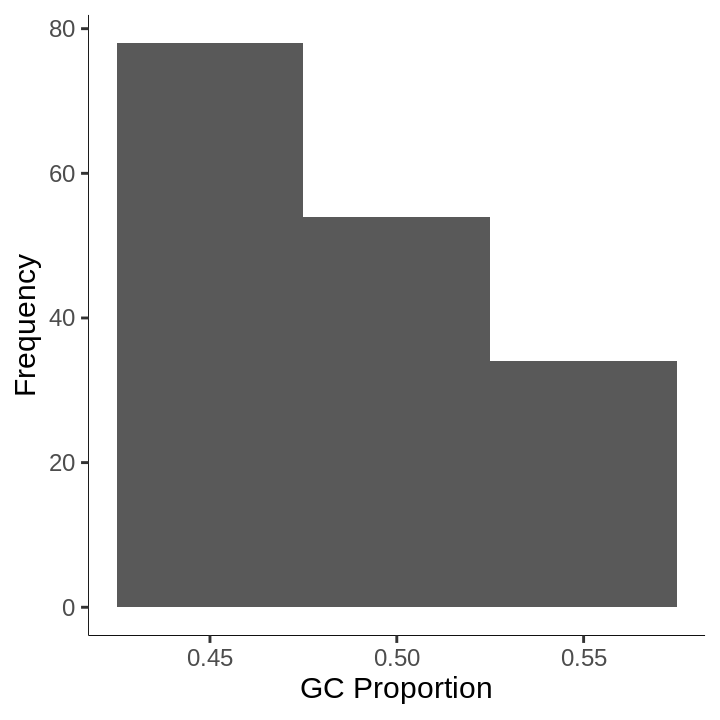

In [15]:
options(repr.plot.width=6, repr.plot.height=6)

bam.qc %>%
    ggplot(aes(x=GC.percentage)) +
    geom_histogram(binwidth=0.05) +
    xlab("GC Proportion") + ylab("Frequency") +
    ggplot_theme

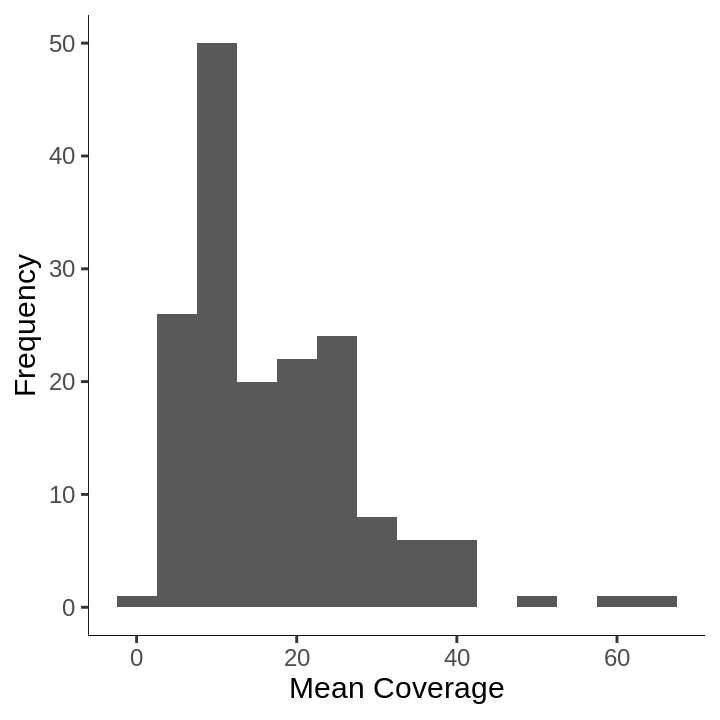

In [16]:
options(repr.plot.width=6, repr.plot.height=6)

bam.qc %>%
    ggplot(aes(x=mean.coverage)) +
    geom_histogram(binwidth=5) +
    xlab("Mean Coverage") + ylab("Frequency") +
    ggplot_theme